<a href="https://colab.research.google.com/github/williamokomba/williamokomba-Molinga-school--dsp6-week-4-IP/blob/master/%22Moringa_Data_Science_Prep_W4_Independent_Project_2020_09_william_okomba_Python_Notebook%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Molinga prep Data science independent project: week 4

Objective

Indentify the mostpopular hour of the day picking ups shared electric car(Bluecar) in the city of Paris over the month of April 2018.

Dataset provided

1.Autolib dataset [http://bit.ly/autolib_dataset

2.Autolib dataset description https://drive.google.com/file/d/13DXF2CFWQLeYxxHFekng8HJnH_jtbfpN/view 

Main steps to be followed

* load the dataset into python 
* clean the dataset
* Identify the most popular hour of the day for picking up a shared electric car (Bluecar).
* Find the most popular hour for returning cars.
* Indentify the station that is the most popular overall.
* find the most picking hours.
* Find the postal code that is the most popular for picking up Blue cars? Does the most popular station belong to that postal code,Overall.
At the most popular picking hour.
* Indentify the most popular picking hour.
* Find out whether the results change if you consider Utilib and Utilib 1.4 instead of Blue cars 
* Hint:
* To compute usage, we will need to understand that we have to join successive (in time) measures/counters for a given station, as the difference will tell whether a car was picked up, returned, or nothing happened.













##1.0 Importing our libruaries

In [ ]:
# Importing the libraries we will need 

# Importing the pandas library
# 
import pandas as pd

# Importing the numpy library
import numpy as np

##1.1 Reading the Dataset from our CSV file.

Autolib dataset [http://bit.ly/autolib_dataset

In [ ]:
#Let's read the data from the CSV file and create the dataframe to be used
df = pd.read_csv("http://bit.ly/autolib_dataset")
df. head ()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


the table has 5000 cells

##1.2 Previewing our Dataset

In [ ]:
#Let's preview the first 10 rows of our data
df.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


##1.3 Accessing Information about our Dataset

In [ ]:
#Getting to know more about the dataset by accessing its information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

the Dataset has 5000 cells, and 15 colunms

##2.0 Cleaning Dataset



##2.1 validity

In [ ]:
#a: checking the colunms information
df.columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City',
       'Displayed comment', 'ID', 'Kind', 'Geo point', 'Postal code',
       'Public name', 'Rental status', 'Scheduled at', 'Slots', 'Station type',
       'Status', 'Subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [ ]:
#b: Irrelevant Data Observation
# Data Cleaning Action: Dropping address,displayed comment,scheduled at,ID,subscription status, year, minute, geo point,attribute
# Explanation: We won't need it during Analysis. No question to be answered requires that column
df1 = df
df1.head()
df1.drop(columns=["Address","Displayed comment","Scheduled at","ID","Kind","Subscription status", "year","minute","month","Geo point"],axis=1, inplace=True)
df1.head()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Postal code,Public name,Rental status,Slots,Station type,Status,day,hour
0,0,0,0,0,0,nonexistent,Paris,75015,Paris/Suffren/2,operational,2,station,ok,8,11
1,6,6,0,0,0,operational,Paris,75014,Paris/Raymond Losserand/145,operational,0,station,ok,6,7
2,3,3,0,2,0,operational,Le Bourget,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,3,20
3,3,3,1,0,1,operational,Paris,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,4,4
4,3,3,0,0,0,nonexistent,Paris,75017,Paris/Porte de Champerret/6,operational,3,station,ok,8,17


All irrelevant colunms are dropped

In [ ]:
#c.joining the two colunms and getting the sum,utilib counter and utilib 1.4 counter.
sum_colunm = df1["Utilib counter"] + df1["Utilib 1.4 counter"]
df1["Utility_total"] = sum_colunm
df1

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Postal code,Public name,Rental status,Slots,Station type,Status,day,hour,Utility_total
0,0,0,0,0,0,nonexistent,Paris,75015,Paris/Suffren/2,operational,2,station,ok,8,11,0
1,6,6,0,0,0,operational,Paris,75014,Paris/Raymond Losserand/145,operational,0,station,ok,6,7,0
2,3,3,0,2,0,operational,Le Bourget,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,3,20,2
3,3,3,1,0,1,operational,Paris,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,4,4,1
4,3,3,0,0,0,nonexistent,Paris,75017,Paris/Porte de Champerret/6,operational,3,station,ok,8,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2,0,0,0,nonexistent,Colombes,92700,Colombes/MÃ©nelotte/8,operational,3,station,ok,6,11,0
4996,4,4,0,0,1,operational,Paris,75015,Paris/Dantzig/37,operational,2,station,ok,4,16,0
4997,1,1,0,0,1,operational,Paris,75007,Paris/Bac/142,operational,4,station,ok,1,7,0
4998,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,ok,4,17,0


joining utilib and utilib 1.4 and gettin the sum.

In [ ]:
#checking the Dataframe shape
df1.shape

(5000, 16)

Dataset has 5000 cells and 16 colunms after adding a new colunms

In [ ]:
#c:syntax errors in values
# Data Cleaning Action:removing leading and trailing spaces
# Explanation:We can use the str.strip function so that to make manupulation easier.
df1.columns= df1.columns.str.strip()
df1.head()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Postal code,Public name,Rental status,Slots,Station type,Status,day,hour,Utility_total
0,0,0,0,0,0,nonexistent,Paris,75015,Paris/Suffren/2,operational,2,station,ok,8,11,0
1,6,6,0,0,0,operational,Paris,75014,Paris/Raymond Losserand/145,operational,0,station,ok,6,7,0
2,3,3,0,2,0,operational,Le Bourget,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,3,20,2
3,3,3,1,0,1,operational,Paris,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,4,4,1
4,3,3,0,0,0,nonexistent,Paris,75017,Paris/Porte de Champerret/6,operational,3,station,ok,8,17,0


The Dataset has no syntax errors

##2.2Accuracy

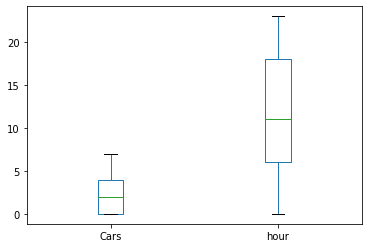

In [ ]:
#a: outliers
#Data Cleaning Action:clearing outliers
# Explanation:this help in accuracy when it comes to data analyis.
#checking outliers using matplotlib
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
% matplotlib inline
#
df1_matplotlib = df1.boxplot(column =['Cars', 'hour'], grid = False)
df1_matplotlib

there is no outliers.

In [ ]:
# Dataframe after checking outliers
df1.head()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Postal code,Public name,Rental status,Slots,Station type,Status,day,hour,Utility_total
0,0,0,0,0,0,nonexistent,Paris,75015,Paris/Suffren/2,operational,2,station,ok,8,11,0
1,6,6,0,0,0,operational,Paris,75014,Paris/Raymond Losserand/145,operational,0,station,ok,6,7,0
2,3,3,0,2,0,operational,Le Bourget,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,3,20,2
3,3,3,1,0,1,operational,Paris,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,4,4,1
4,3,3,0,0,0,nonexistent,Paris,75017,Paris/Porte de Champerret/6,operational,3,station,ok,8,17,0


Dataset after checking for outliers

##2.3 completeness

In [ ]:
# a:checking the missing dataset values
# Data Cleaning Action:dropping all the missing values
# Explanation:this ensures the data is complete and easy to manupulate
df1.isnull().any()

Cars                  False
Bluecar counter       False
Utilib counter        False
Utilib 1.4 counter    False
Charge Slots          False
Charging Status       False
City                  False
Postal code           False
Public name           False
Rental status         False
Slots                 False
Station type          False
Status                False
day                   False
hour                  False
Utility_total         False
dtype: bool

checking for missing values returns zero value

In [ ]:
# verifing if there's nolonger missing values
df1.isnull(). sum()


Cars                  0
Bluecar counter       0
Utilib counter        0
Utilib 1.4 counter    0
Charge Slots          0
Charging Status       0
City                  0
Postal code           0
Public name           0
Rental status         0
Slots                 0
Station type          0
Status                0
day                   0
hour                  0
Utility_total         0
dtype: int64

This verify that there is no Null values in the Dataset

##2.4 Consistency

In [ ]:
#a: checking duplicate values
#Data Cleaning Action:dropping the duplicated values in case they are there.
# Explanation:this ensures the data is complete and gives credible result deuring analysis.
#
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

There is no duplicated values

##2.5 uniformity

In [ ]:
#a: checking if colunms names need to be changed, name changed to uppercases, and converting strings to datetime
# Data Cleaning Action:Renaming dataframe colunm and coverting string to datetime
# Explanation:makes manupulation easy
#
df1.head()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Postal code,Public name,Rental status,Slots,Station type,Status,day,hour,Utility_total
0,0,0,0,0,0,nonexistent,Paris,75015,Paris/Suffren/2,operational,2,station,ok,8,11,0
1,6,6,0,0,0,operational,Paris,75014,Paris/Raymond Losserand/145,operational,0,station,ok,6,7,0
2,3,3,0,2,0,operational,Le Bourget,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,3,20,2
3,3,3,1,0,1,operational,Paris,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,4,4,1
4,3,3,0,0,0,nonexistent,Paris,75017,Paris/Porte de Champerret/6,operational,3,station,ok,8,17,0


No colunm to be renamed, no colunm to be be changed to upper case, and no string to be changed to datetime.

In [ ]:
#getting clean dataset after data cleaning
df2 = clean_df1 =df1
df2.head

<bound method NDFrame.head of       Cars  Bluecar counter  Utilib counter  ...  day  hour Utility_total
0        0                0               0  ...    8    11             0
1        6                6               0  ...    6     7             0
2        3                3               0  ...    3    20             2
3        3                3               1  ...    4     4             1
4        3                3               0  ...    8    17             0
...    ...              ...             ...  ...  ...   ...           ...
4995     2                2               0  ...    6    11             0
4996     4                4               0  ...    4    16             0
4997     1                1               0  ...    1     7             0
4998     2                2               0  ...    4    17             0
4999     4                4               0  ...    8    10             0

[5000 rows x 16 columns]>

clean Dataset still maintains 5000 cells and 16 colunms

##3.0 Answering questions

In [ ]:
#challenge 3.1
#Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018. Bonus Questions (Optional)
#
#picking_hour =(df2['Rental status']=='operational')]
df2_paris=df2[(df2['City']=='Paris') & (df2['Bluecar counter']>0) & (df2['Rental status']=='operational')]
df2_paris.head()
#the popular hour of the day.
df2_popular_picking_hour=df2_paris.groupby(['hour'])['Bluecar counter'].sum()
df2_popular_picking_hour.sort_values(ascending=False).head()


hour
21    268
6     260
12    250
9     250
3     242
Name: Bluecar counter, dtype: int64

the most popular hour of picking an electric blue car is at 21hours.

In [ ]:
#challenge 3.2
#What is the most popular hour for returning cars?
df2_returning_cars = df2[(df2['Rental status']=='nonexistent')]
df2_returning_cars.head()
#the popular hour of the day.
df2_popular_Returning_hour=df2_returning_cars.groupby(['hour'])['Cars'].sum()
df2_popular_Returning_hour.sort_values(ascending=False).head()

hour
13    0
5     0
2     0
Name: Cars, dtype: int64

the popular hour of returning all the cars is 13 hours

In [ ]:
#challenge 3.3
#What station is the most popular? Overall?
df2_popular_station=df2.groupby(['Public name'])['Cars'].sum()
df2_popular_station.sort_values(ascending=False).head()


Public name
Fontenay-aux-Roses/Robert Marchand/32     50
Le Plessis-Robinson/GalilÃ©e/16           49
Fontenay-aux-Roses/Lombard/20             47
Fontenay-aux-Roses/Division Leclerc/31    43
Paris/Philippe Auguste/126                42
Name: Cars, dtype: int64

most popular station is Fontenay-aux-Roses/Robert Marchand

In [ ]:
#challenge 3.4
#What station is the most popular picking hour
df2_avail_cars = df2[(df2['Rental status']=='operational')]
df2_popular_pick_hour=df2_avail_cars.groupby(['Public name','hour'])['Cars'].sum()
df2_popular_pick_hour.sort_values(ascending=False).head()

Public name                          hour
Courbevoie/Paix/2                    2       15
Paris/Porte de Villiers/28           8       15
Saint-Ouen/Louis Blanc/35            2       14
VÃ©lizy-Villacoublay/Paul Dautier/2  13      14
Paris/Claude Bernard/16              4       14
Name: Cars, dtype: int64

popular picking hours is 2hours

In [ ]:
#challenge 3.5
#What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
#Overall?
df2_postal_code=df2.groupby(['Postal code'])['Bluecar counter'].sum()
df2_postal_code.sort_values(ascending=False).head()

Postal code
75015    609
75016    595
75017    529
92000    464
75020    442
Name: Bluecar counter, dtype: int64

most popular postal code is 75015  

In [ ]:
#challenge 3.6
#What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
#At the most popular picking hour?
df2_avail_cars = df2[(df2['Rental status']=='operational')]
df2_popular_pick_hour_code=df2_avail_cars.groupby(['Postal code','hour'])['Bluecar counter'].sum()
df2_popular_pick_hour_code.sort_values(ascending=False).head()

the most popular station belongs to the same postal code 75015 which is the most popular code.

In [ ]:
#3.7a: Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars?
#What postal code is the most popular for picking up Utilib? Does the most popular station belong to that postal code?
#Overall?
df2_postal_code_utilib=df2.groupby(['Postal code'])['Utilib counter'].sum()
df2_postal_code_utilib.sort_values(ascending=False).head()

Postal code
75017    20
75016    20
75015    20
75020    13
75013    12
Name: Utilib counter, dtype: int64

using Utilib result still remains the same, postal code is 75017

In [ ]:
##3.7b: Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars?
##What postal code is the most popular for picking up utilib? Does the most popular station belong to that postal code?
#At the most popular picking hour?
df2_avail_cars = df2[(df2['Rental status']=='operational')]
df2_postal_code_utilib=df2_avail_cars.groupby(['Postal code','hour'])['Utilib counter'].sum()
df2_postal_code_utilib.sort_values(ascending=False).head()


Postal code  hour
75015        7       3
75011        6       3
75020        6       3
75017        19      3
92500        3       3
Name: Utilib counter, dtype: int64

using Utilib result still remains the same, postal code is 75017 but hour changes to 7hours

In [ ]:
#3.7c: Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars?
#What postal code is the most popular for picking up Utilib? Does the most popular station belong to that postal code?
#Overall?
df2_postal_code_utilib1=df2.groupby(['Postal code'])['Utilib 1.4 counter'].sum()
df2_postal_code_utilib1.sort_values(ascending=False).head()

Postal code
75017    40
75015    34
75019    33
75020    26
75016    25
Name: Utilib 1.4 counter, dtype: int64

by using utilib 1.4, popular postatl code still remain the same 75017

In [ ]:
#challenge 3.7d: Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars?
##What postal code is the most popular for picking up utilib 1.4? Does the most popular station belong to that postal code?
#At the most popular picking hour?
df2_avail_cars = df2[(df2['Rental status']=='operational')]
df2_postal_code_utilib1=df2_avail_cars.groupby(['Postal code','hour'])['Utilib 1.4 counter'].sum()
df2_postal_code_utilib1.sort_values(ascending=False).head()

Postal code  hour
92310        0       6
75014        21      6
75019        10      5
75015        13      4
75020        17      4
Name: Utilib 1.4 counter, dtype: int64

using utilib 1.4 counter yield different result, popular postal code is 92310 at 00hours.

##Recomendations



*   From our analysis, we would recommend that a company would prioritize on 21hours in Paris city since this is the popular hour the electric shared car(Bluecar) are mostly rented out.
*   The company would therefore make profit if the electric cars are increased at this time

